# Time series demo 4: take-home exercises

**Guest lecture**

Columbia IEOR 4729 : _Model Based Trading: Theory and Practice_

Q McCallum (http://qethanm.cc)

If you're interested in exploring this topic more, I would recommend you:

**1 - Review an introductory time series text to get a more thorough tour of the subject.**  _Introductory Time Series with R_ (Cowpertwait,Metcalfe) is my favorite.  It's a deceptively slim book that covers a _lot_ of ground.  Their sample code is in R but don't let that stop you.

**2 - Plot other series, to recognize shapes of ACF and PACF plots.** For example: how do the ACF and PACF plots look for a linear series?  Sinusoidal data?  

**3 - Try other model fits.** Tonight, we worked through some autoregressive time series. Try to adapt that code for moving average (MA) and autoregressive integrated moving average (ARIMA) models.

The next notebook has sample code for moving average models.

**4 - Explore tools to decompose a series.**  Create a series by mixing, say, sinusoidal data with an increasing linear trend.  Then try to work backwards to decompose it into those pieces, and model accordingly.

**5 - Explore predictions.**  We only covered building and testing models tonight.  We didn't cover predictions.  Try to work through how to do time series predictions in Python (hint: check out the `statsmodels` documentation for `statsmodels.tsa.arima_model.ARMAResultsWrapper`.  This is the datatype of the `fit_ar_...` variables we used tonight.


Of special note for predictions: in order to test your models' predictive power, you'll need to test them somehow, right?  To do that: 

    ## generate, say, 1500 points
    y_ar = ar_process.generate_sample( 1500 )
    
    ## split that into a training set and a test set
    y_ar_train = y_ar[ :1000 ]
    y_ar_test = y_ar[ 1000 : ]
    
    ## feed just the training set to ARMA()
    model_ar = sm.tsa.ARMA( y_ar_train , ... )
    fit_ar = model_Ar.fit( ... )
    
    ## predict the next 500 values
    y_ar_predict = fit_ar.predict( .... )
    
    
    ## Compare y_predict to y_ar_test

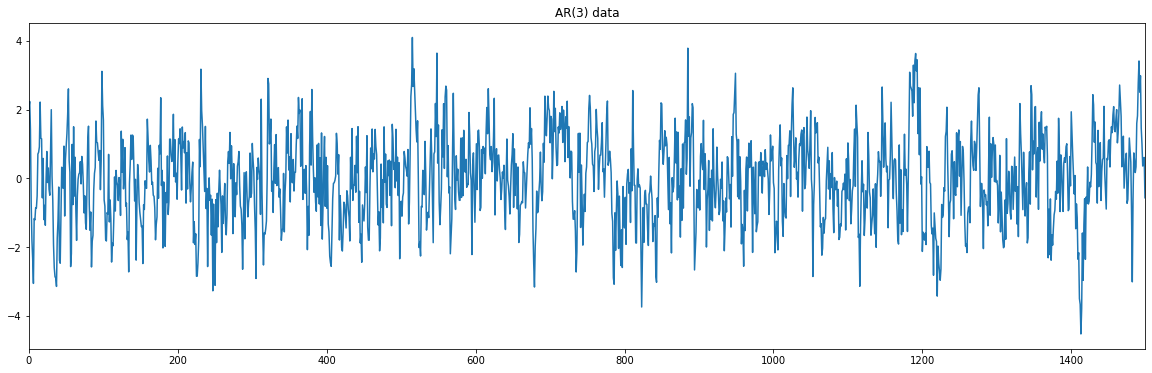

In [24]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

process_ar3 = sm.tsa.ArmaProcess(
    ar = [ 1 , - 0.5 , - 0.25 , 0.1 ] ,
    ma = [ 1 ] ,
)

## Let the ARMA process warm up for a bit (`burnin` parameter)
## and generate 500 points befitting an AR(3) model of our stated parameters
## generate, say, 1500 points
y_ar = process_ar3.generate_sample(
    1500 ,
    burnin = 1000
)

## being lazy and building a temporary Series for plotting
_ = pd.Series( y_ar3 ).plot(
    title = "AR(3) data" ,
    figsize = ( 20 , 6 )
)

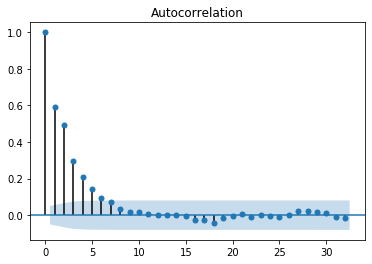

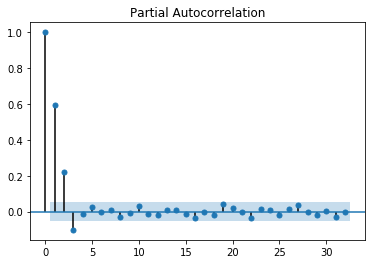

In [25]:
_ = sm.graphics.tsa.plot_acf( y_ar3 )
_ = sm.graphics.tsa.plot_pacf( y_ar3 )

In [26]:
## split that into a training set and a test set
y_ar_train = y_ar[ :1400 ]
y_ar_test = y_ar[ 1400 : ]

## feed just the training set to ARMA()
model_ar3 = sm.tsa.ARMA( y_ar_train , (3,0) )
fit_ar3 = model_ar3.fit( trend="nc" , disp=0 )
fit_ar3.summary()

## predict the next 100 values
y_ar_predict = fit_ar3.predict(0, 99)

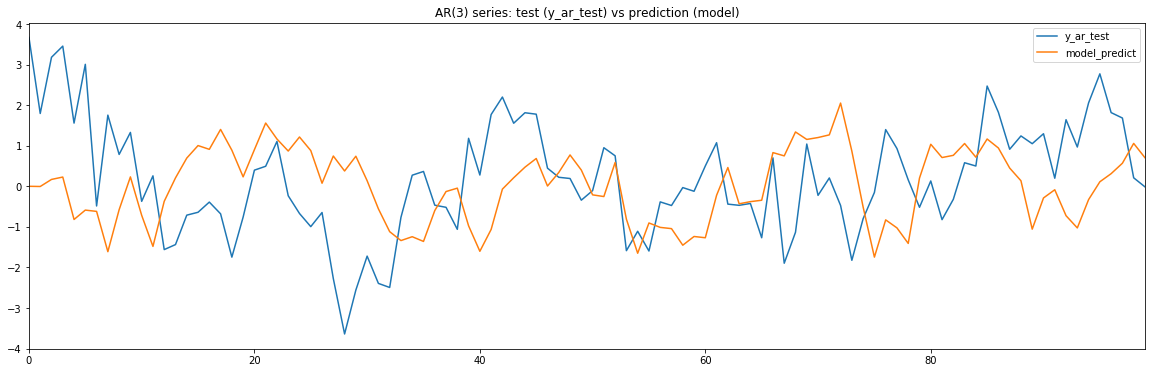

In [27]:
_ = pd.DataFrame(
    {
        "y_ar_test"   : y_ar_test , 
        "model_predict"  : y_ar_predict
    }
).plot(
    title = "AR(3) series: test (y_ar_test) vs prediction (model)" ,
    figsize = ( 20 , 6 )
)